# Supervised Machine Learning
## Final Project: Decision Trees vs. Support Vector Machines
Gagandeep Singh

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining color-palette for the project
col_pal = "RdBu"

## Data

In [2]:
# import the data
data = pd.read_csv('data/airline_passenger_satisfaction.csv', index_col=0)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Data Description
This dataset contains an airline passenger satisfaction survey. The dataset comprises information gathered from a survey conducted on airline passenger satisfaction, encompassing a range of factors influencing the travel experience. It includes demographic details such as `gender` and `age`, flight specifics like `distance` and `class`, and assessments of various services such as `onboard amenities`, `booking processes`, and `inflight entertainment`. Each aspect is rated on a satisfaction scale, alongside metrics for `departure and arrival delays`. With these insights, airlines can discern patterns, prioritize improvements, and tailor services to enhance overall passenger satisfaction and loyalty.

I'll use this data to analyze and understand factors affecting passenger satisfaction. By examining the various attributes provided in the dataset, the airline company can gain insights into what aspects of the passenger experience are most influential in determining satisfaction levels.

I'll also Create a classification model that will predict wheather a passenger was satisfied or not for future surveys.

### Prediction Errors:
In this particular dataset, false negatives might be slightly more harmful than false positives because misidentifying satisfied passengers as dissatisfied could result in unnecessary efforts and resources being allocated. However, both false positives and false negatives have potential negative implications for the airline company's customer satisfaction efforts and operational efficiency.

## Data Cleaining

In [3]:
data.shape

(129880, 24)

Dropping unnecessary columns

In [4]:
data.drop('id', axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [6]:
# normalize the column names
for col in data.columns:
    data.rename(columns={col: col.lower().replace(' ', '_')}, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure/arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

Check of null values

In [8]:
data.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

As we can see the only the `arrival_delay_in_minutes` column has null values. I assume this is the case because the flight was not delayed for these passengers, so I will fill these with `0`.

In [9]:
# we'll fill these values with 0 
data.fillna(value=0, inplace=True)

In [10]:
# check of null values
data.isna().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure/arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

I see that there are some columns with data type `object`. Let's see what these columns have in them. This also includes our target column `satisfaction`.

I'll be storing these column names in a list for ease of use.

In [12]:
obj_type_cols = [col for col in data.columns if data[col].dtype=='O']

for col in obj_type_cols:
    print(col + '\n-------------------')
    print(data[col].value_counts(), end='\n\n')

gender
-------------------
Female    65899
Male      63981
Name: gender, dtype: int64

customer_type
-------------------
Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64

type_of_travel
-------------------
Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

class
-------------------
Business    62160
Eco         58309
Eco Plus     9411
Name: class, dtype: int64

satisfaction
-------------------
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64



I see that these are categorical columns with most of them having just 2 classes with the exception of `class` column which has 3 classes. 

I'll handle these columns by encoding them into integer classes.

In [13]:
# first I'll create a copy of the dataset to be safe.
encoded_data = data.copy(deep=True)

In [14]:
# using pd.factorize to encode the columns
class_indeces = {}
for col in obj_type_cols:
    encoded_data[col+'_enc'], ind = pd.factorize(encoded_data[col])
    class_indeces[col] = ind

In [15]:
encoded_data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,gender_enc,customer_type_enc,type_of_travel_enc,class_enc,satisfaction_enc
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,25,18.0,neutral or dissatisfied,0,0,0,0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,4,1,1,6.0,neutral or dissatisfied,0,1,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,5,0,0.0,satisfied,1,0,1,1,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,4,2,11,9.0,neutral or dissatisfied,1,0,1,1,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,0,0.0,satisfied,0,0,1,1,1


Now we have 5 extra columns at the end of the dataset with the encoded data. So, now we can drop the original columns.

In [16]:
encoded_data.drop(columns=obj_type_cols, axis=1, inplace=True)
encoded_data.head()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_enc,customer_type_enc,type_of_travel_enc,class_enc,satisfaction_enc
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,0,0,0,0,0
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,0,1,1,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,1,0,1,1,1
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,1,0,1,1,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,0,0,1,1,1


In [17]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   age                                129880 non-null  int64  
 1   flight_distance                    129880 non-null  int64  
 2   inflight_wifi_service              129880 non-null  int64  
 3   departure/arrival_time_convenient  129880 non-null  int64  
 4   ease_of_online_booking             129880 non-null  int64  
 5   gate_location                      129880 non-null  int64  
 6   food_and_drink                     129880 non-null  int64  
 7   online_boarding                    129880 non-null  int64  
 8   seat_comfort                       129880 non-null  int64  
 9   inflight_entertainment             129880 non-null  int64  
 10  on-board_service                   129880 non-null  int64  
 11  leg_room_service                   1298

Now we don't have any column with datatype object

Our dataset has some columns that are responses from a survey, so lets check those out now. 

In [18]:
encoded_data.describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_enc,customer_type_enc,type_of_travel_enc,class_enc,satisfaction_enc
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,...,3.306267,3.642193,3.286326,14.713713,15.045465,0.507384,0.183092,0.690584,1.376486,0.434463
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,...,1.266185,1.176669,1.313682,38.071126,38.416353,0.499947,0.386743,0.462255,0.616170,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,0.000000,1.000000,2.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [19]:
# lets store the survey columns in a list for ease of use
survey_cols = ['inflight_wifi_service'
               , 'departure/arrival_time_convenient'
               , 'ease_of_online_booking'
               , 'gate_location'
               , 'food_and_drink'
               , 'online_boarding'
               , 'seat_comfort'
               , 'inflight_entertainment'
               , 'on-board_service'
               , 'leg_room_service'
               , 'baggage_handling'
               , 'checkin_service'
               , 'inflight_service'
               , 'cleanliness']

In [20]:
# check value counts for each survey col
for col in survey_cols:
    print(col + '\n----------------------------------')
    print(encoded_data[col].value_counts(), end='\n\n')

inflight_wifi_service
----------------------------------
2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: inflight_wifi_service, dtype: int64

departure/arrival_time_convenient
----------------------------------
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: departure/arrival_time_convenient, dtype: int64

ease_of_online_booking
----------------------------------
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: ease_of_online_booking, dtype: int64

gate_location
----------------------------------
3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: gate_location, dtype: int64

food_and_drink
----------------------------------
4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: food_and_drink, dtype: int64

online_boarding
----------------------------------
4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: online_boarding, dtype: int64

seat_comfort
-------

As we can see each survey response is rating out of 5.

# EDA
Let's visualize the data.

We'll first have a look at the responses to each survey question and the target classes.

<AxesSubplot:xlabel='satisfaction_enc', ylabel='count'>

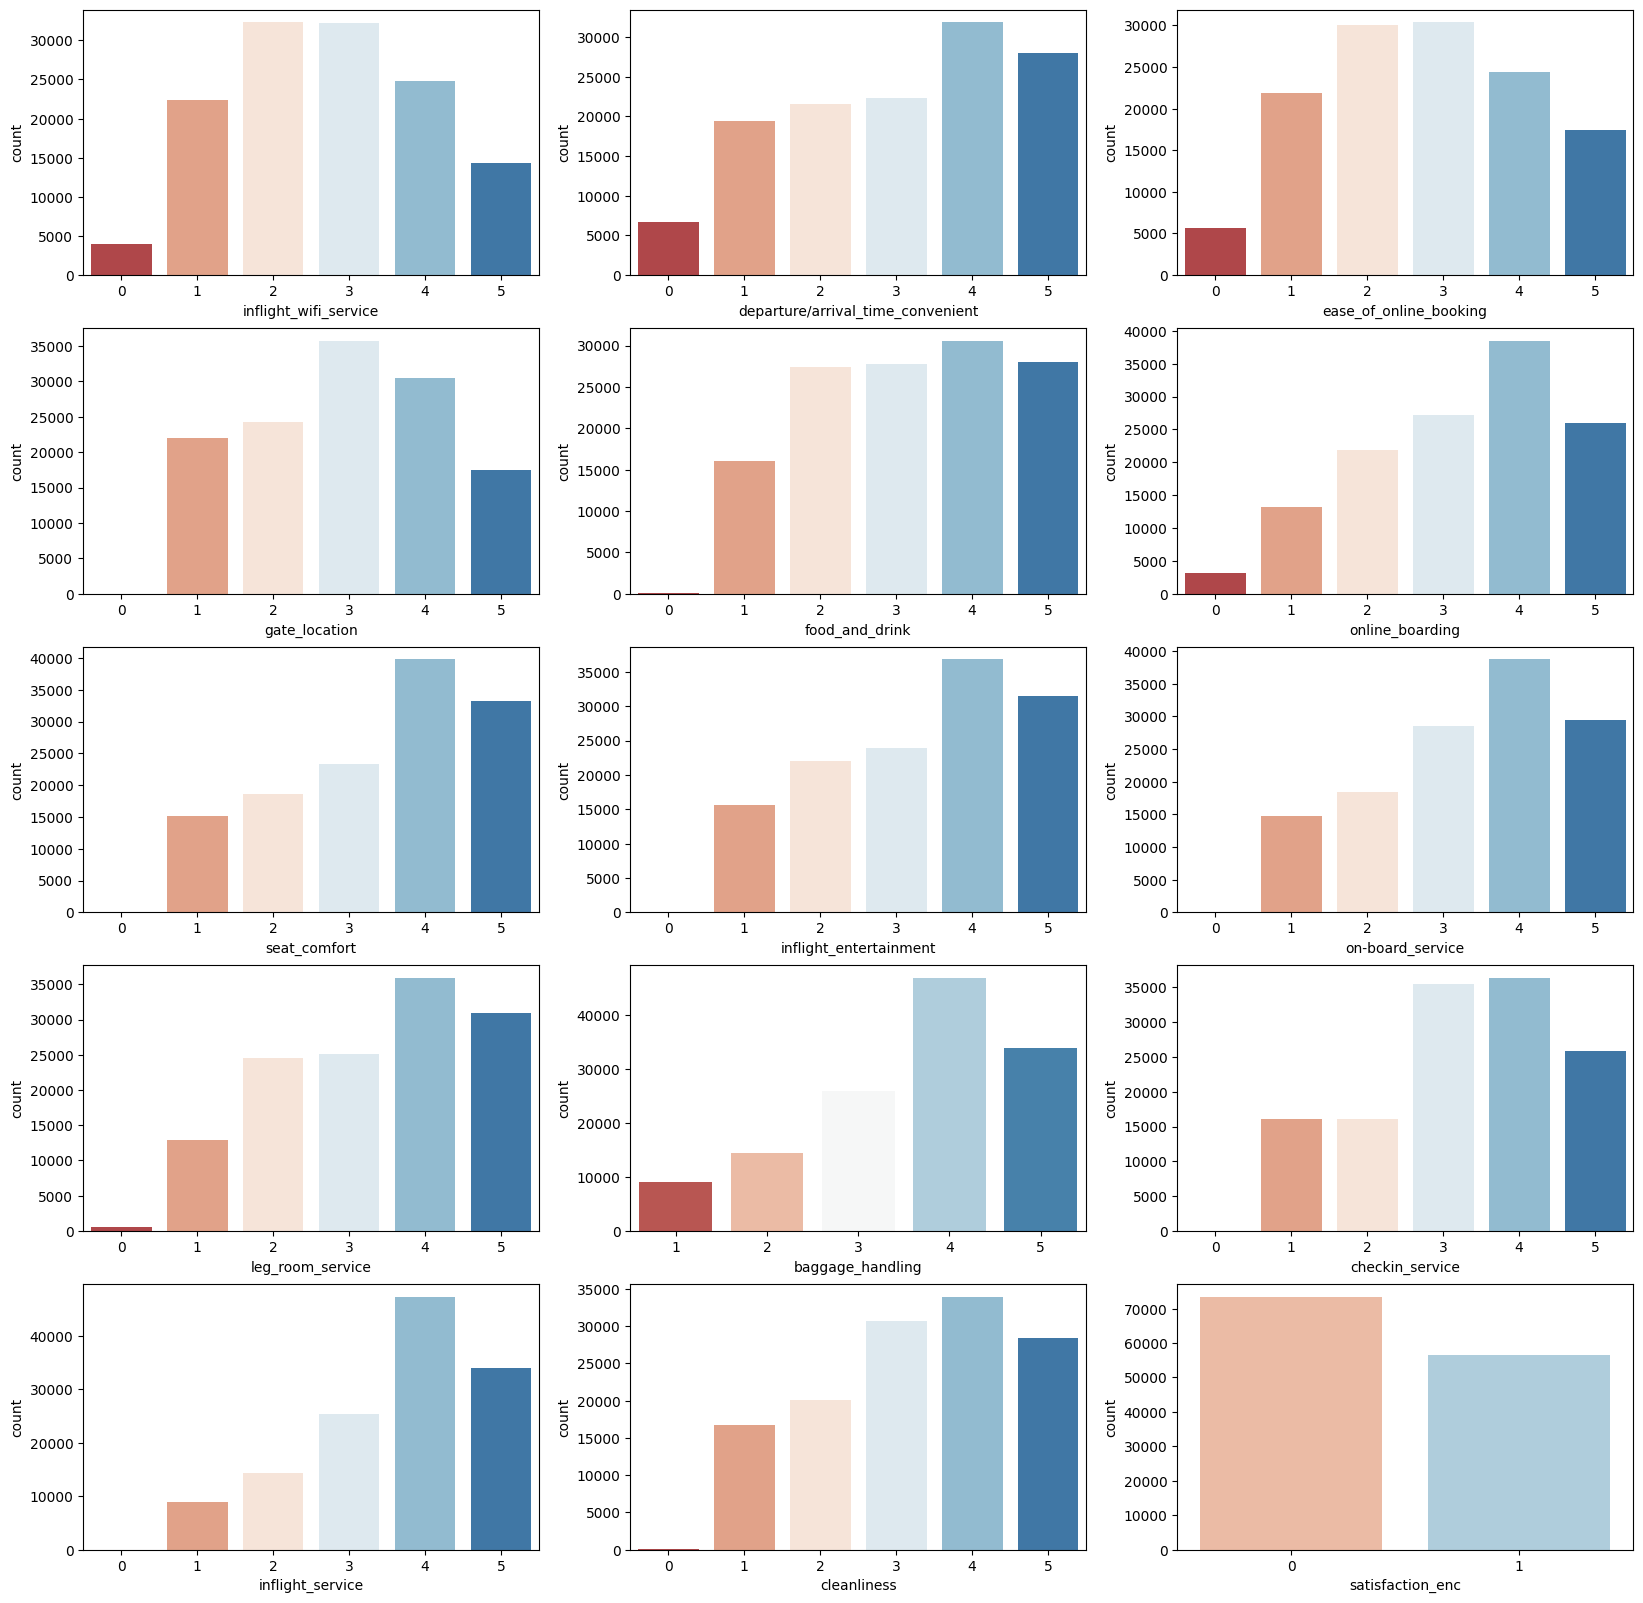

In [21]:
# creating 15 plots to fit in all the columns
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

# index to get the column for survey_cols
col_no = 0

# iterating through and ploting all the columns
for i in range(5):
    for j in range(3):
        sns.countplot(encoded_data[survey_cols[col_no]]
                    , x=encoded_data[survey_cols[col_no]].index
                    , palette=col_pal
                    , ax=ax[i][j])
        if not col_no == 13:
            col_no += 1
            
sns.countplot(encoded_data['satisfaction_enc']
                    , x=encoded_data['satisfaction_enc'].index
                    , palette=col_pal
                    , ax=ax[4][2])

Lets look at how each column correlates to our target column

In [22]:
corr_matrix = encoded_data.corr()['satisfaction_enc'].drop('satisfaction_enc')
corr_matrix

age                                  0.134091
flight_distance                      0.298085
inflight_wifi_service                0.283460
departure/arrival_time_convenient   -0.054270
ease_of_online_booking               0.168877
gate_location                       -0.002793
food_and_drink                       0.211340
online_boarding                      0.501749
seat_comfort                         0.348829
inflight_entertainment               0.398234
on-board_service                     0.322205
leg_room_service                     0.312424
baggage_handling                     0.248680
checkin_service                      0.237252
inflight_service                     0.244918
cleanliness                          0.307035
departure_delay_in_minutes          -0.050740
arrival_delay_in_minutes            -0.058145
gender_enc                          -0.011236
customer_type_enc                   -0.186017
type_of_travel_enc                   0.449861
class_enc                         

Let's plot this info for better understanding.

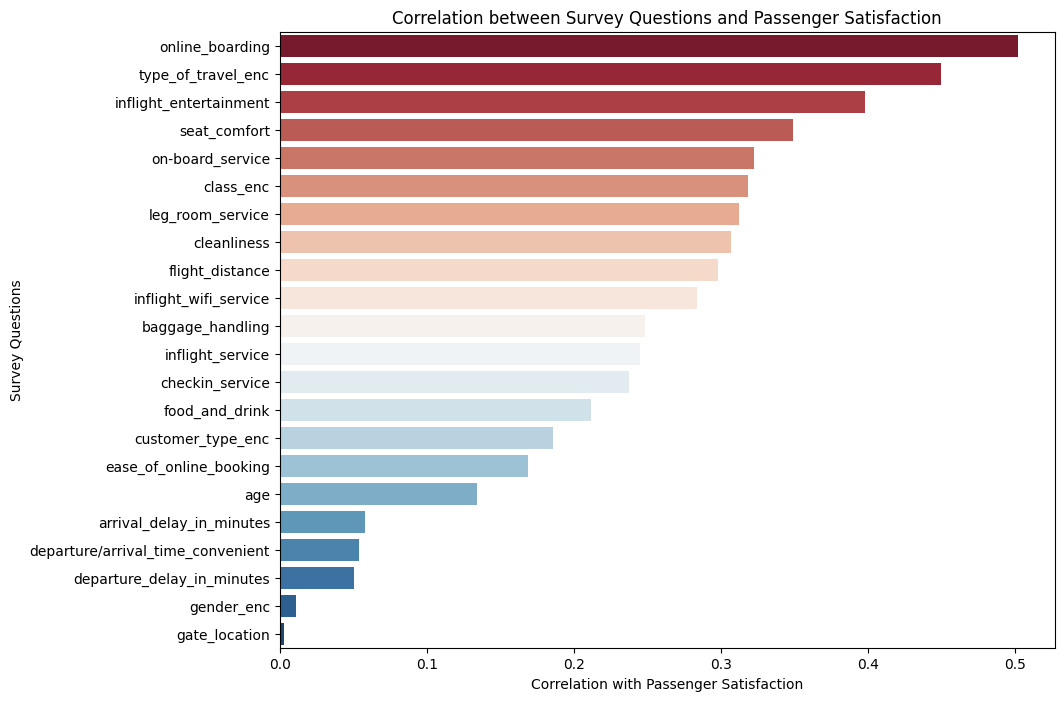

In [23]:
satisfaction_correlation_sorted = corr_matrix.abs().sort_values(ascending=False)

# Visualize correlation results
plt.figure(figsize=(10, 8))
sns.barplot(x=satisfaction_correlation_sorted.values, y=satisfaction_correlation_sorted.index, palette=col_pal)
plt.xlabel('Correlation with Passenger Satisfaction')
plt.ylabel('Survey Questions')
plt.title('Correlation between Survey Questions and Passenger Satisfaction')
plt.show()

As we can see `online_boarding` is the column that is the most influential for our data.

In [24]:
# top 5 most correlated columns
for i, col in enumerate(satisfaction_correlation_sorted.index[:5]):
    print(f"{i+1}: {col}")

1: online_boarding
2: type_of_travel_enc
3: inflight_entertainment
4: seat_comfort
5: on-board_service


In [25]:
encoded_data.to_csv("data/cleaned_data.csv")